Воробьев Андрей Павлович, 465440, J3111

In [32]:
import numpy as np

import matplotlib.pyplot as plt

Анализируемая функция:
$$f(x) = \sqrt{e^x} + 4x$$
на отрезке $[a, b] = [0, 2]$.

Также был выбран другой промежуток $[0, 10]$ для тестирования, так как на нём функция принимает более сложный вид.

In [33]:
def f(x):
    return np.sqrt(np.exp(x)) + 4 * x


a_test = 0
b_test = 10
a = 0
b = 2
n_list = [4, 8, 16, 1000]

Графики функции.

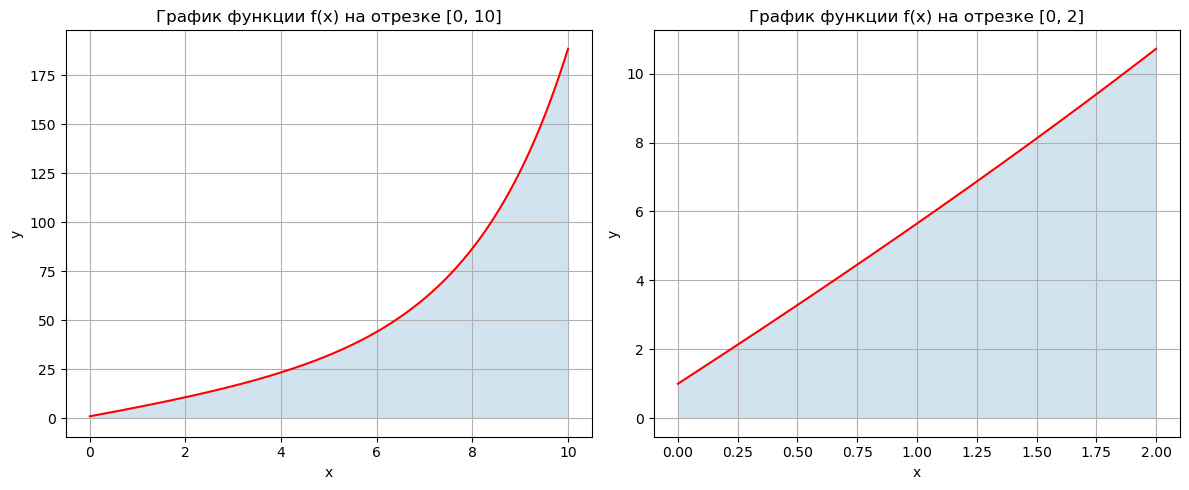

In [34]:
plt.figure(figsize=(12, 5))

x_test = np.linspace(a_test, b_test, 1000)
plt.subplot(1, 2, 1)
plt.plot(x_test, f(x_test), 'r-')
plt.fill_between(x_test, f(x_test), alpha=0.2)
plt.title(f"График функции f(x) на отрезке [{a_test}, {b_test}]")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

x = np.linspace(a, b, 1000)
plt.subplot(1, 2, 2)
plt.plot(x, f(x), 'r-')
plt.fill_between(x, f(x), alpha=0.2)
plt.title(f"График функции f(x) на отрезке [{a}, {b}]")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

plt.tight_layout()

Точное значение интеграла на отрезке

In [35]:
true_value = 2 * np.e + 6
print("Точное значение интеграла на отрезке [0, 2] =", true_value)

true_value_0_10 = 2 * np.exp(5) + 198
print("Точное значение интеграла на отрезке [0, 10] =", true_value_0_10)

Точное значение интеграла на отрезке [0, 2] = 11.43656365691809
Точное значение интеграла на отрезке [0, 10] = 494.8263182051532


Функция для получения разбиения отрезка [a, b] на n равных отрезков, с выбором способа. Также приведены графики разбиений для различных типов.

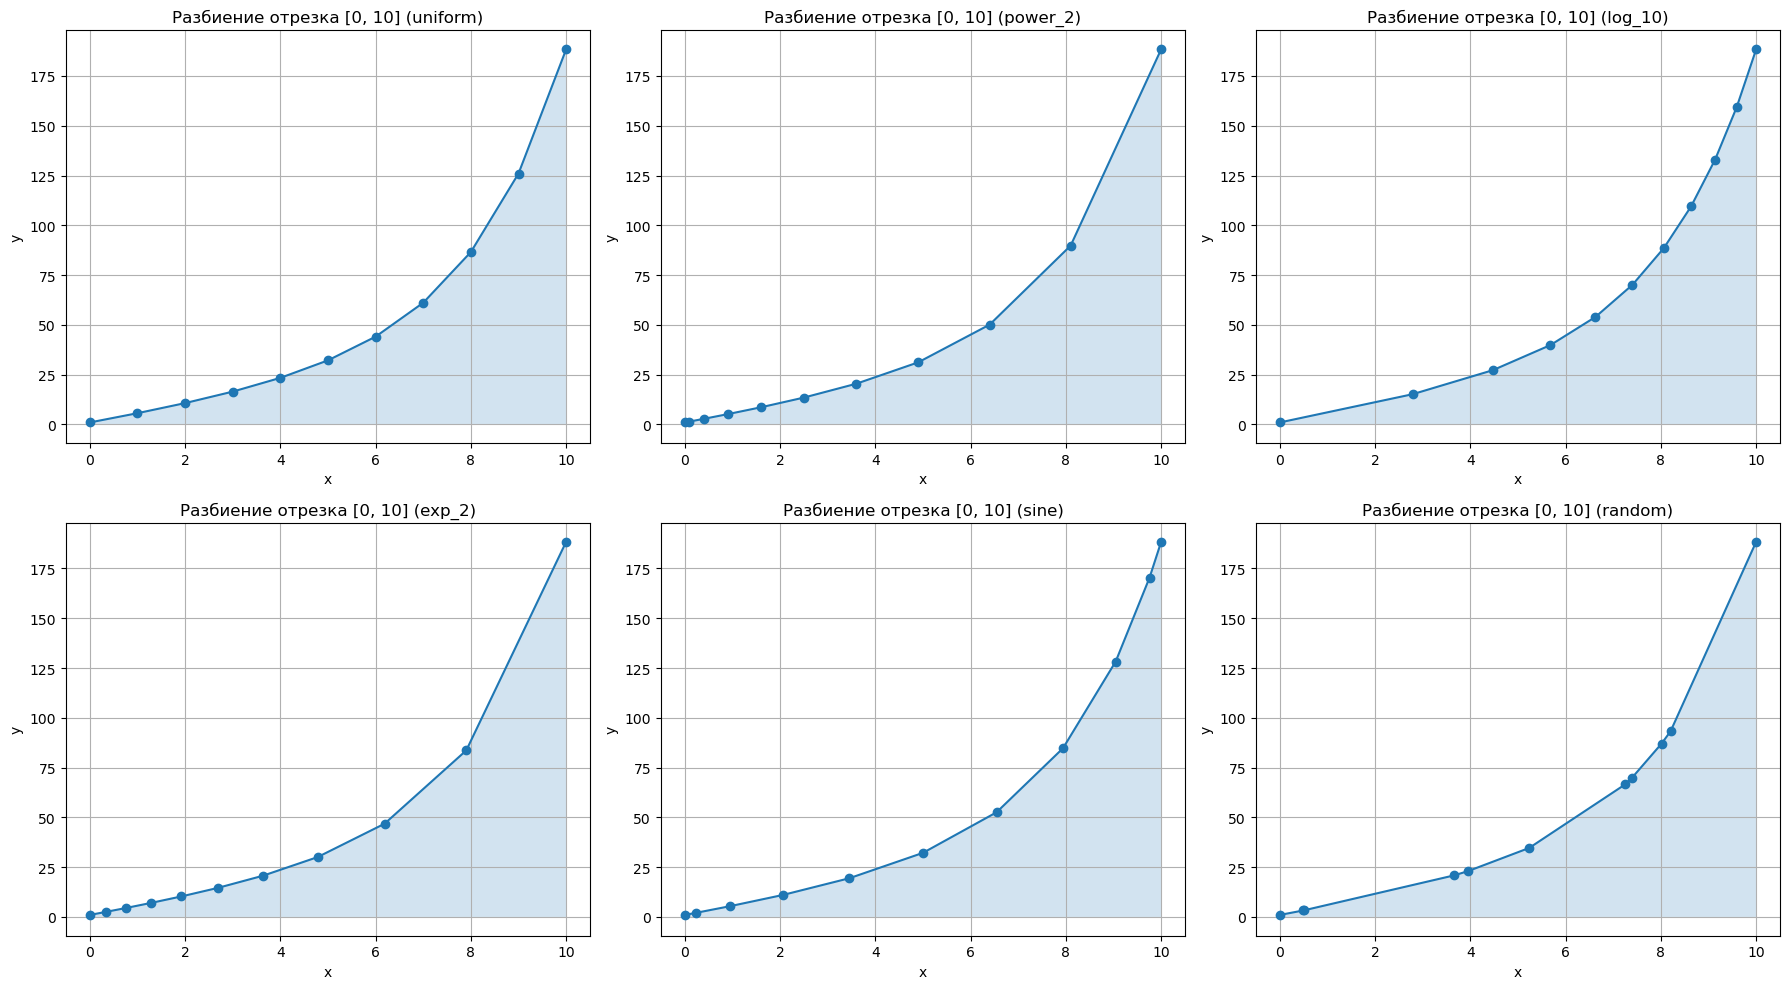

In [36]:
def get_partition(a, b, n=10, type='uniform', **kwargs):
    """
    Функция для получения разбиения отрезка [a, b] на n равных отрезков
    :param a: Начало отрезка
    :param b: Конец отрезка
    :param n: Размер разбиения
    :param type: Тип разбиения:
        uniform (равномерное),
        power (степенное),
        log (логарифмическое),
        exp (экспоненциальное),
        sine (синусоидальное),
        random (случайное)
    :param kwargs: Дополнительные параметры для разбиения:
        alpha (для power),
        rate (для exp),
        base (для log)
    :return: Массив точек разбиения длиной n + 1
    """
    t = np.linspace(0, 1, n + 1)

    if type == "uniform":
        x = t
    elif type == "power":
        alpha = kwargs.get("alpha", 2.0)
        x = t ** alpha
    elif type == "log":
        base = kwargs.get("base", 10)
        log_t = np.linspace(1, base, n + 1)
        x = np.log(log_t) / np.log(base)
    elif type == "exp":
        rate = kwargs.get("rate", 2.0)
        x = (np.exp(rate * t) - 1) / (np.exp(rate) - 1)
    elif type == "sine":
        x = (1 - np.cos(np.pi * t)) / 2
    elif type == "random":
        x = np.sort(np.random.rand(n - 1))
        x = np.concatenate([[0], x, [1]])

    return a + (b - a) * x


partitions = {
    "uniform": get_partition(a_test, b_test, type="uniform"),
    "power_2": get_partition(a_test, b_test, type="power", alpha=2),
    "log_10": get_partition(a_test, b_test, type="log", base=10),
    "exp_2": get_partition(a_test, b_test, type="exp", rate=2),
    "sine": get_partition(a_test, b_test, type="sine"),
    "random": get_partition(a_test, b_test, type="random"),
}

plt.figure(figsize=(18, 10))
for i, (name, x) in enumerate(partitions.items()):
    plt.subplot(2, 3, i + 1)
    plt.plot(x, f(x), 'o-')
    plt.fill_between(x, f(x), alpha=0.2)
    plt.title(f"Разбиение отрезка [{a_test}, {b_test}] ({name})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
plt.tight_layout()
plt.show()

Приведём методы интегрирования:
- Метод левых прямоугольников
- Метод правых прямоугольников
- Метод средних прямоугольников
- Метод трапеций
- Метод Симпсона.

Для каждого разбиения выведем его графически и вычислим приближенное значение интеграла.

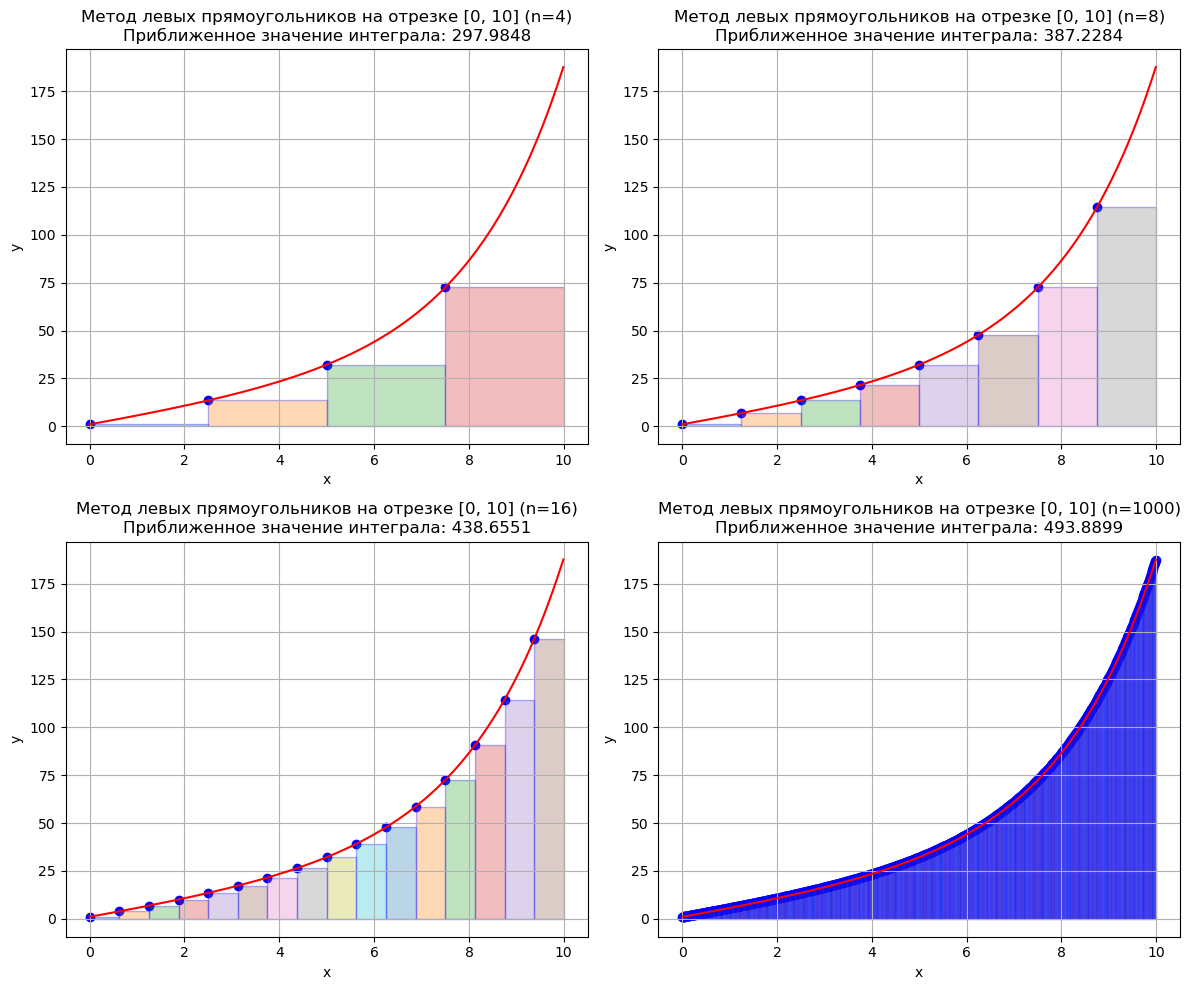

In [37]:
def integral_left_rectangle(f, a, b, n_list, plot=False, **kwargs):
    """
    Метод левых прямоугольников
    :param f: Функция
    :param a: Начало отрезка
    :param b: Конец отрезка
    :param n_list: Список размеров разбиений
    :param plot: Флаг для построения графика
    :param kwargs: Дополнительные параметры для разбиения
    :return: Список приближённых значений интеграла для каждого n
    """
    result = []
    if plot:
        plt.figure(figsize=(12, 10))

    for n in n_list:
        x = get_partition(a, b, n, **kwargs)
        if plot:
            x_plot = []
        integral = 0
        for i in range(n):
            integral += f(x[i]) * (x[i + 1] - x[i])
            if plot:
                x_plot.append(x[i])
        result.append(integral)

        if plot:
            plt.subplot(2, 2, n_list.index(n) + 1)
            plt.plot(np.arange(a, b, 0.01), f(np.arange(a, b, 0.01)), 'r-')
            plt.scatter(x_plot, f(np.array(x_plot)), color='b')
            for i in range(n):
                x_left = x[i]
                x_right = x[i + 1]
                y_val = f(x_plot[i])
                X_rect = [x_left, x_right, x_right, x_left, x_left]
                Y_rect = [0, 0, y_val, y_val, 0]
                plt.fill(X_rect, Y_rect, alpha=0.3, edgecolor='b')
            plt.title(f"Метод левых прямоугольников на отрезке [{a}, {b}] (n={n})\n"
                      f"Приближенное значение интеграла: {integral:.4f}")
            plt.xlabel("x")
            plt.ylabel("y")
            plt.grid()

    if plot:
        plt.tight_layout()
        plt.show()
    return result


result_left_test = integral_left_rectangle(f, a_test, b_test, n_list, plot=True)

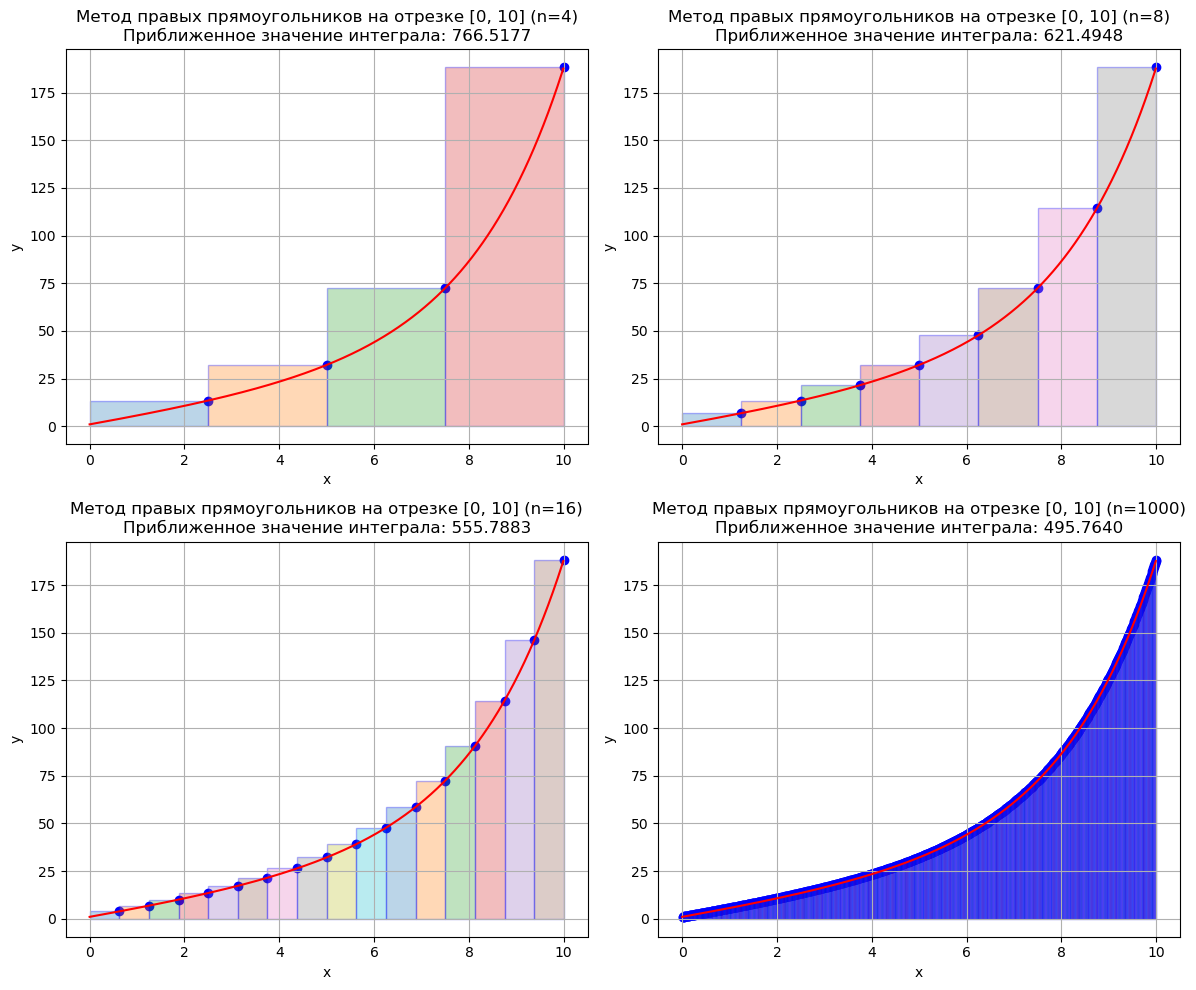

In [38]:
def integral_right_rectangle(f, a, b, n_list, plot=False, **kwargs):
    """
    Метод правых прямоугольников
    :param f: Функция
    :param a: Начало отрезка
    :param b: Конец отрезка
    :param n_list: Список размеров разбиений
    :param plot: Флаг для построения графика
    :param kwargs: Дополнительные параметры для разбиения
    :return: Список приближённых значений интеграла для каждого n
    """
    result = []
    if plot:
        plt.figure(figsize=(12, 10))

    for n in n_list:
        x = get_partition(a, b, n, **kwargs)
        if plot:
            x_plot = []
        integral = 0
        for i in range(n):
            integral += f(x[i + 1]) * (x[i + 1] - x[i])
            if plot:
                x_plot.append(x[i + 1])
        result.append(integral)

        if plot:
            plt.subplot(2, 2, n_list.index(n) + 1)
            plt.plot(np.arange(a, b, 0.01), f(np.arange(a, b, 0.01)), 'r-')
            plt.scatter(x_plot, f(np.array(x_plot)), color='b')
            for i in range(n):
                x_left = x[i]
                x_right = x[i + 1]
                y_val = f(x_plot[i])
                X_rect = [x_left, x_right, x_right, x_left, x_left]
                Y_rect = [0, 0, y_val, y_val, 0]
                plt.fill(X_rect, Y_rect, alpha=0.3, edgecolor='b')
            plt.title(f"Метод правых прямоугольников на отрезке [{a}, {b}] (n={n})\n"
                      f"Приближенное значение интеграла: {integral:.4f}")
            plt.xlabel("x")
            plt.ylabel("y")
            plt.grid()

    if plot:
        plt.tight_layout()
        plt.show()
    return result


result_right_test = integral_right_rectangle(f, a_test, b_test, n_list, plot=True)

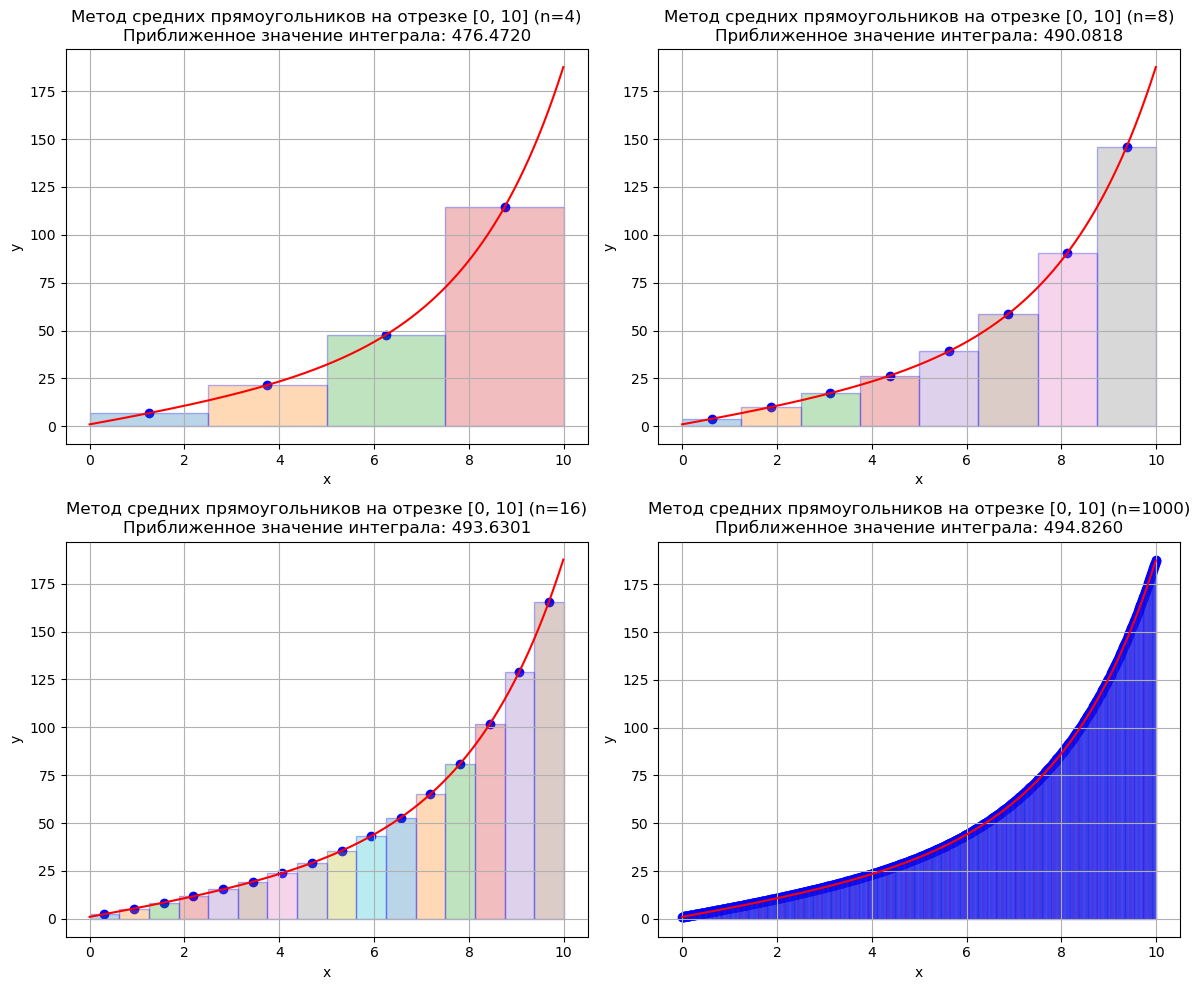

In [39]:
def integral_midpoint_rectangle(f, a, b, n_list, plot=False, **kwargs):
    """
    Метод средних прямоугольников
    :param f: Функция
    :param a: Начало отрезка
    :param b: Конец отрезка
    :param n_list: Список размеров разбиений
    :param plot: Флаг для построения графика
    :param kwargs: Дополнительные параметры для разбиения
    :return: Список приближённых значений интеграла для каждого n
    """
    result = []
    if plot:
        plt.figure(figsize=(12, 10))

    for n in n_list:
        x = get_partition(a, b, n, **kwargs)
        if plot:
            x_plot = []
        integral = 0
        for i in range(n):
            integral += f((x[i] + x[i + 1]) / 2) * (x[i + 1] - x[i])
            if plot:
                x_plot.append((x[i] + x[i + 1]) / 2)
        result.append(integral)

        if plot:
            x_plot.sort()
            plt.subplot(2, 2, n_list.index(n) + 1)
            plt.plot(np.arange(a, b, 0.01), f(np.arange(a, b, 0.01)), 'r-')
            plt.scatter(x_plot, f(np.array(x_plot)), color='b')
            for i in range(n):
                x_left = x[i]
                x_right = x[i + 1]
                y_val = f(x_plot[i])
                X_rect = [x_left, x_right, x_right, x_left, x_left]
                Y_rect = [0, 0, y_val, y_val, 0]
                plt.fill(X_rect, Y_rect, alpha=0.3, edgecolor='b')
            plt.title(f"Метод средних прямоугольников на отрезке [{a}, {b}] (n={n})\n"
                      f"Приближенное значение интеграла: {integral:.4f}")
            plt.xlabel("x")
            plt.ylabel("y")
            plt.grid()

    if plot:
        plt.tight_layout()
        plt.show()
    return result


result_mid_test = integral_midpoint_rectangle(f, a_test, b_test, n_list, plot=True)

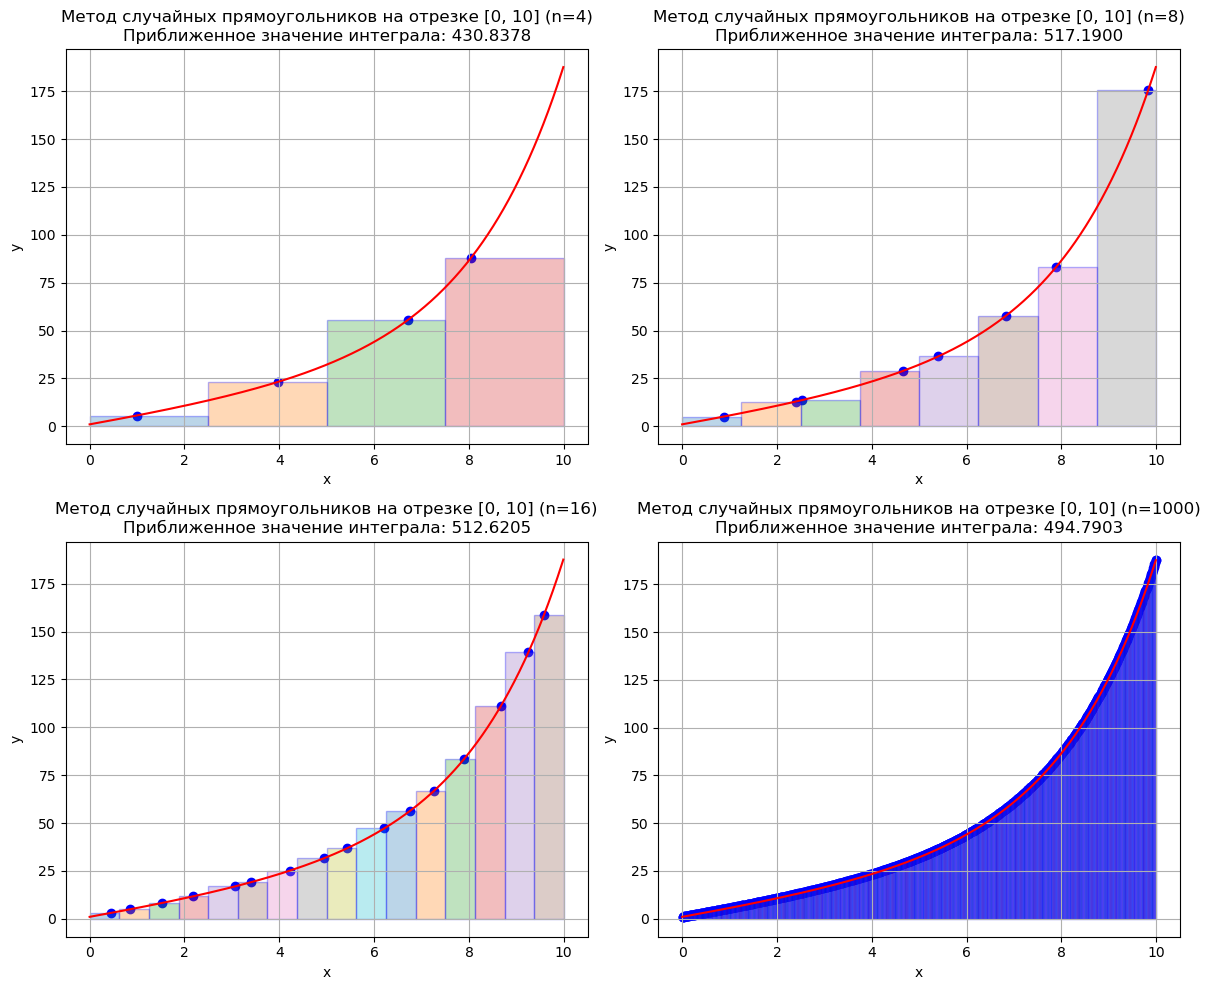

In [40]:
def integral_random_rectangle(f, a, b, n_list, plot=False, **kwargs):
    """
    Метод случайных прямоугольников
    :param f: Функция
    :param a: Начало отрезка
    :param b: Конец отрезка
    :param n_list: Список размеров разбиений
    :param plot: Флаг для построения графика
    :param kwargs: Дополнительные параметры для разбиения
    :return: Список приближённых значений интеграла для каждого n
    """
    result = []
    if plot:
        plt.figure(figsize=(12, 10))

    for n in n_list:
        x = get_partition(a, b, n, **kwargs)
        if plot:
            x_plot = []
        integral = 0
        for i in range(n):
            point = np.random.rand()
            integral += f(x[i] + (x[i + 1] - x[i]) * point) * (x[i + 1] - x[i])
            if plot:
                x_plot.append(x[i] + (x[i + 1] - x[i]) * point)
        result.append(integral)

        if plot:
            x_plot.sort()
            plt.subplot(2, 2, n_list.index(n) + 1)
            plt.plot(np.arange(a, b, 0.01), f(np.arange(a, b, 0.01)), 'r-')
            plt.scatter(x_plot, f(np.array(x_plot)), color='b')
            for i in range(n):
                x_left = x[i]
                x_right = x[i + 1]
                y_val = f(x_plot[i])
                X_rect = [x_left, x_right, x_right, x_left, x_left]
                Y_rect = [0, 0, y_val, y_val, 0]
                plt.fill(X_rect, Y_rect, alpha=0.3, edgecolor='b')
            plt.title(f"Метод случайных прямоугольников на отрезке [{a}, {b}] (n={n})\n"
                      f"Приближенное значение интеграла: {integral:.4f}")
            plt.xlabel("x")
            plt.ylabel("y")
            plt.grid()

    if plot:
        plt.tight_layout()
        plt.show()
    return result


result_mid_test = integral_random_rectangle(f, a_test, b_test, n_list, plot=True)

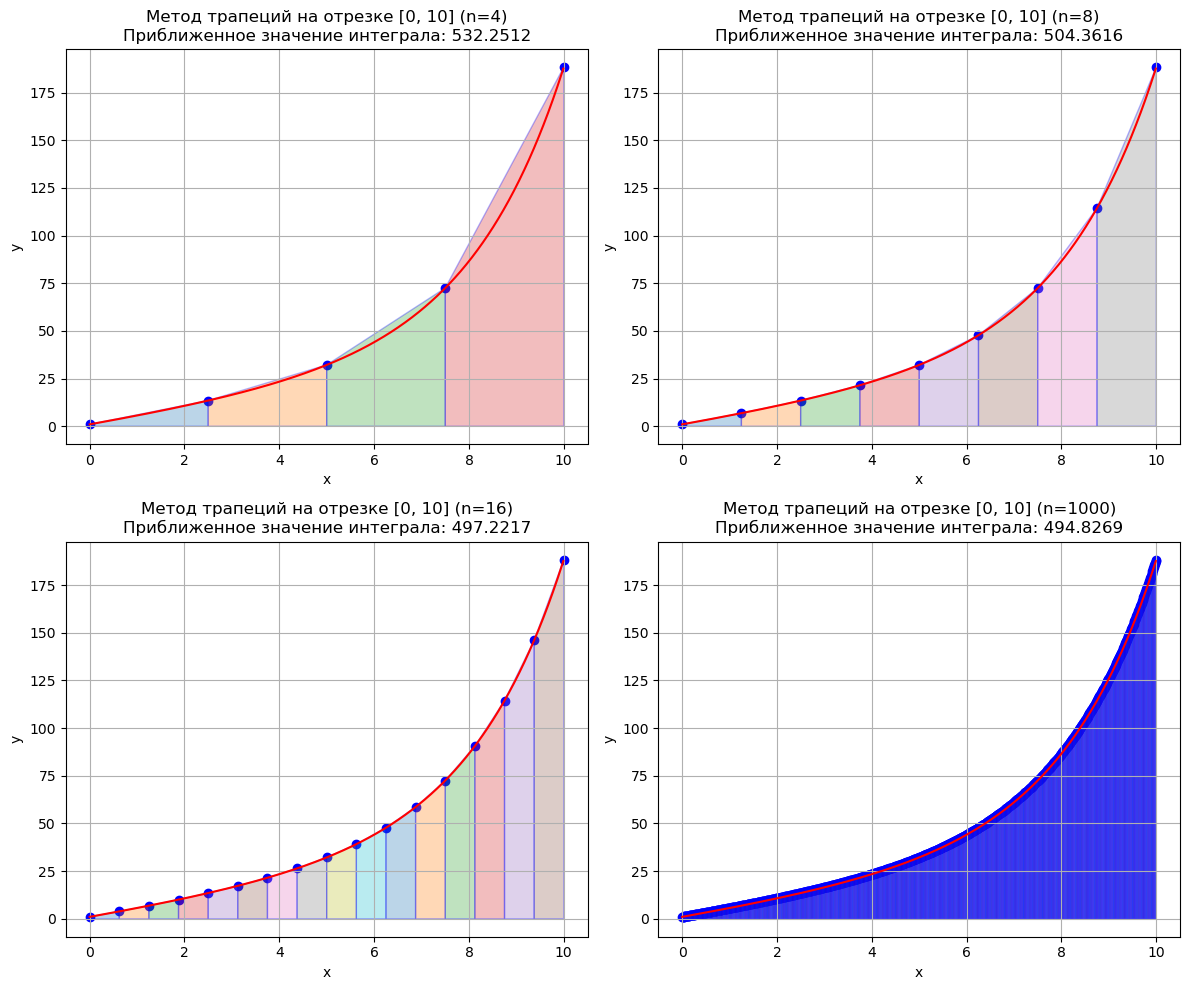

In [41]:
def integral_trapezoid(f, a, b, n_list, plot=False, **kwargs):
    """
    Метод трапеций
    :param f: Функция
    :param a: Начало отрезка
    :param b: Конец отрезка
    :param n_list: Список размеров разбиений
    :param plot: Флаг для построения графика
    :param kwargs: Дополнительные параметры для разбиения
    :return: Список приближённых значений интеграла для каждого n
    """
    result = []
    if plot:
        plt.figure(figsize=(12, 10))

    for n in n_list:
        x = get_partition(a, b, n, **kwargs)
        integral = 0
        for i in range(n):
            integral += (f(x[i]) + f(x[i + 1])) * (x[i + 1] - x[i]) / 2
        result.append(integral)

        if plot:
            plt.subplot(2, 2, n_list.index(n) + 1)
            plt.plot(np.arange(a, b, 0.01), f(np.arange(a, b, 0.01)), 'r-')
            plt.scatter(x, f(x), color='b')
            for i in range(n):
                x_left = x[i]
                x_right = x[i + 1]
                y_val_left = f(x_left)
                y_val_right = f(x_right)
                X_rect = [x_left, x_right, x_right, x_left, x_left]
                Y_rect = [0, 0, y_val_right, y_val_left, 0]
                plt.fill(X_rect, Y_rect, alpha=0.3, edgecolor='b')
            plt.title(f"Метод трапеций на отрезке [{a}, {b}] (n={n})\n"
                      f"Приближенное значение интеграла: {integral:.4f}")
            plt.xlabel("x")
            plt.ylabel("y")
            plt.grid()

    if plot:
        plt.tight_layout()
        plt.show()
    return result


result_trap_test = integral_trapezoid(f, a_test, b_test, n_list, plot=True)

Для метода Сипсона приведена функция $$y = \sin(x),$$ так как она более наглядно показывает разницу между методами. Также приведены графики для всех разбиений.

Значение y = sin(x) на отрезке [-10, 5] = -1.1227337145396787
Случайное разбиение


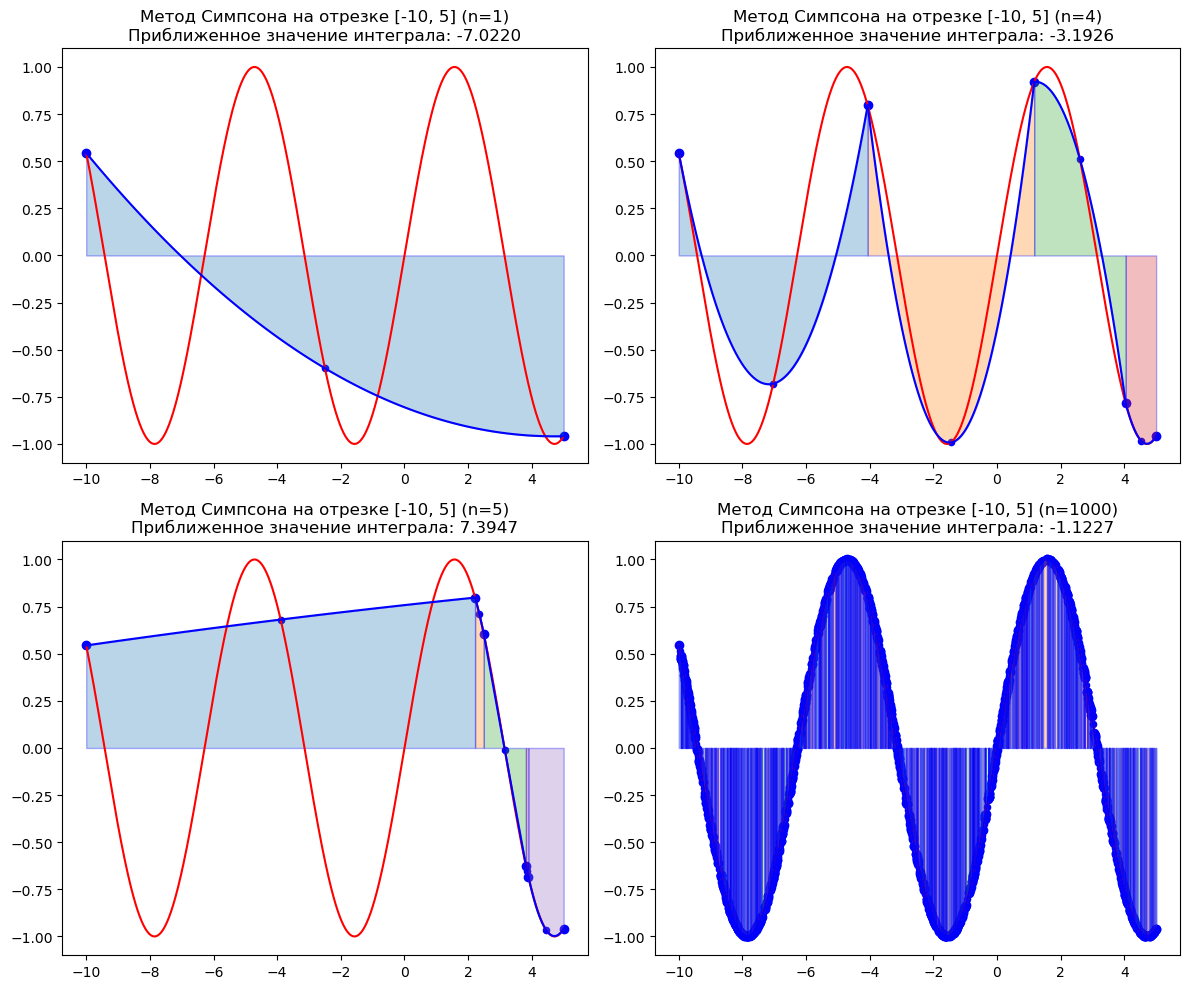

Равномерное разбиение


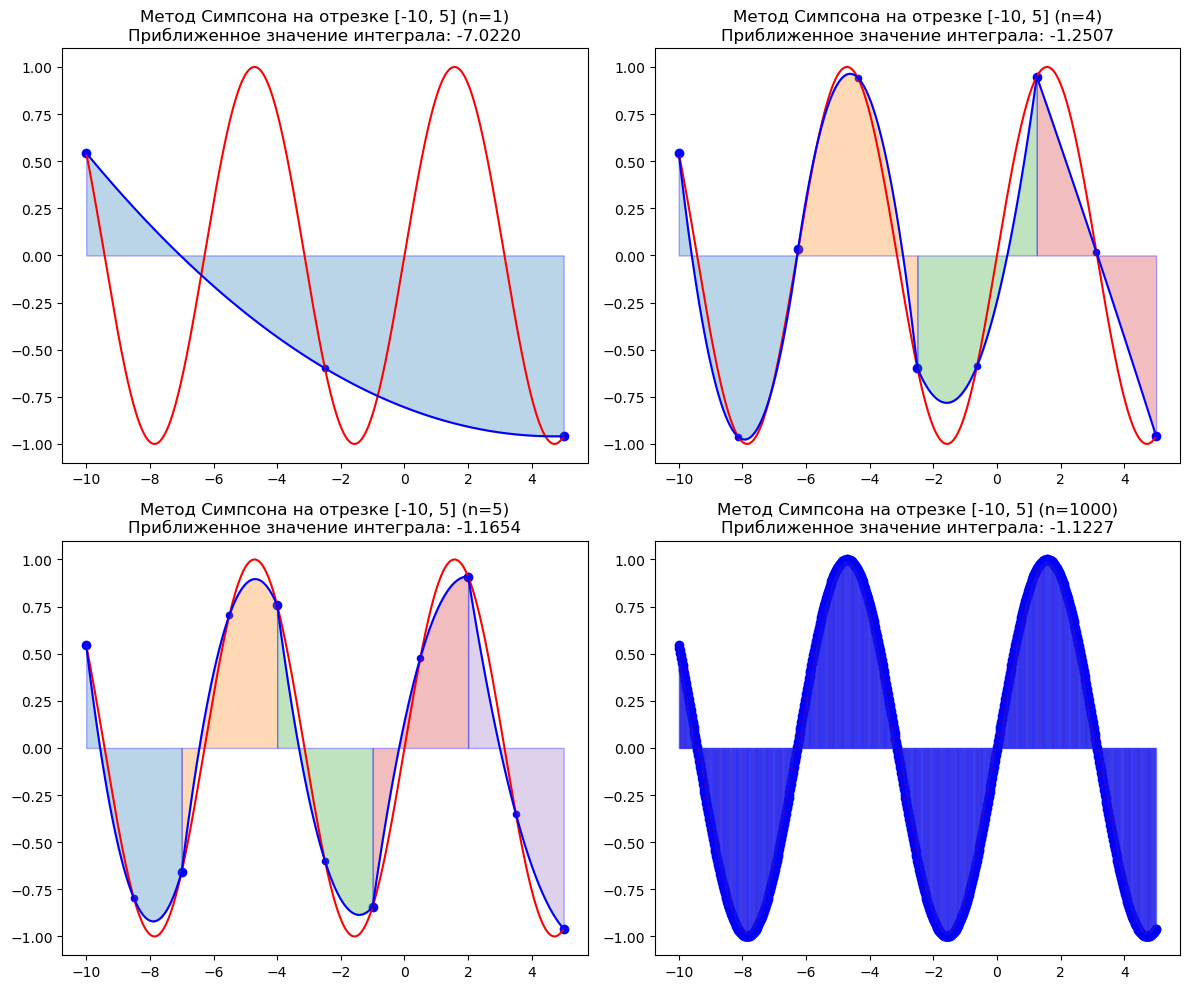

Степенное разбиение


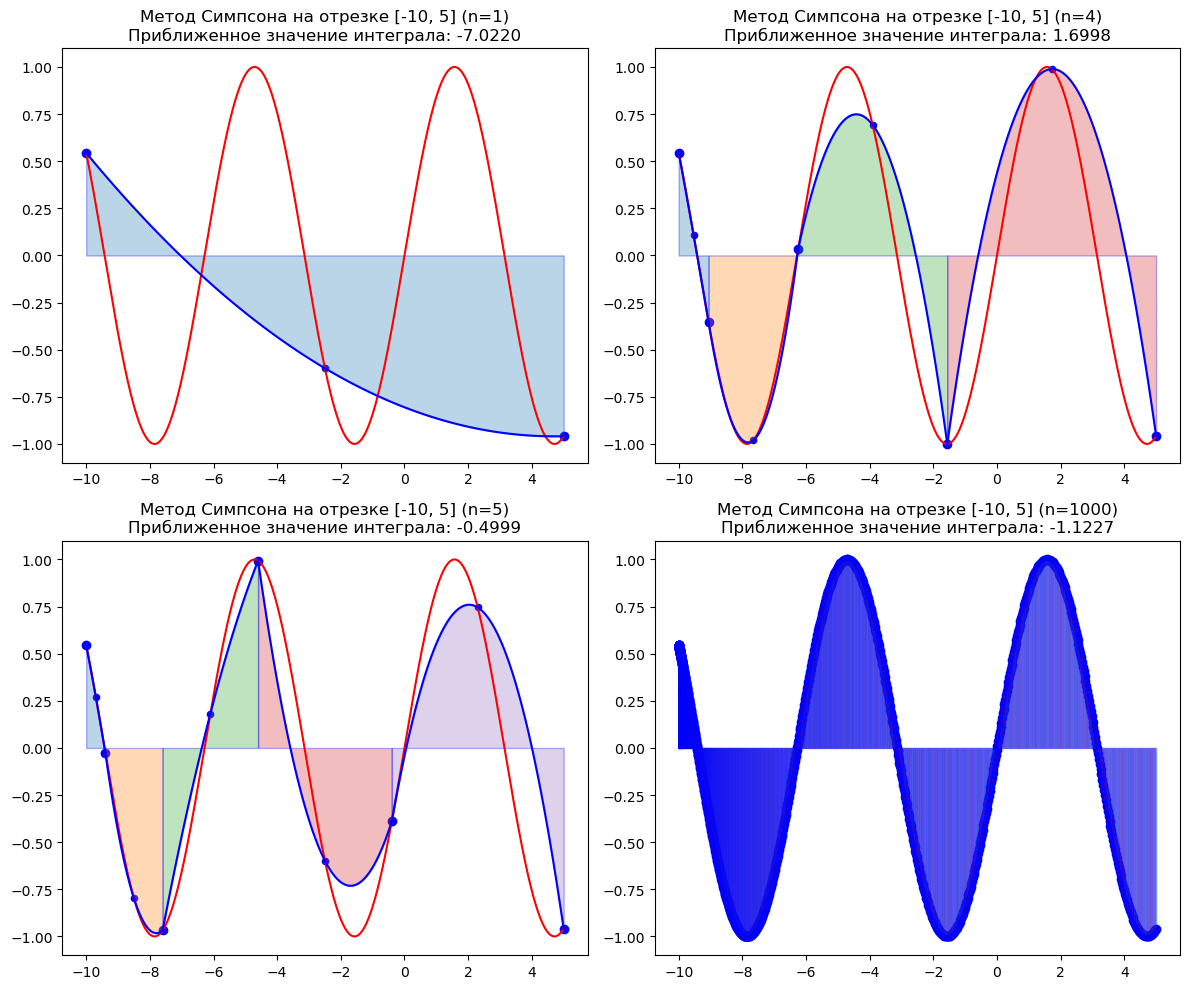

Изначальная функция


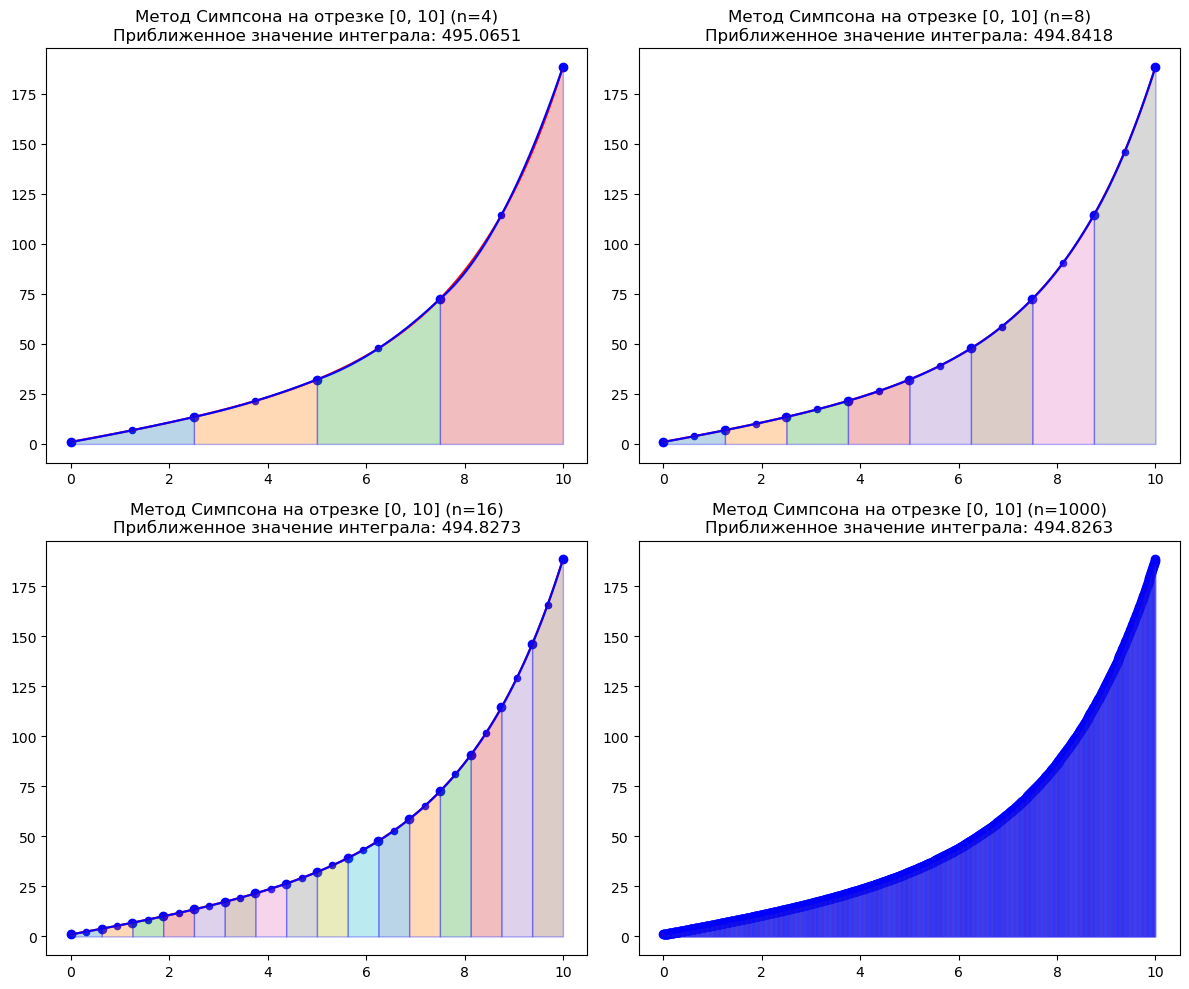

In [42]:
def quadratic_by_formulas(x1, y1, x2, y2, x3, y3):
    denominator = (x3 - x1) * (x2 - x1) * (x3 - x2)
    a = ((y3 - y1) * (x2 - x1) - (y2 - y1) * (x3 - x1)) / denominator
    b = (y2 - y1) / (x2 - x1) - a * (x2 + x1)
    c = y1 - a * x1 ** 2 - b * x1
    return lambda x: a * x ** 2 + b * x + c


def integral_simpson(f, a, b, n_list, plot=False, **kwargs):
    """
    Метод Симпсона
    :param f: Функция
    :param a: Начало отрезка
    :param b: Конец отрезка
    :param n_list: Список размеров разбиений (количество точек)
    :param plot: Флаг для построения графика
    :param kwargs: Дополнительные параметры для разбиения
    :return: Список приближённых значений интеграла для каждого n
    """
    result = []
    if plot:
        plt.figure(figsize=(12, 10))

    for n in n_list:
        x = get_partition(a, b, n, **kwargs)
        if plot:
            x_plot = []
        integral = 0
        for i in range(0, n):
            integral += (f(x[i]) + 4 * f((x[i + 1] + x[i]) / 2) + f(x[i + 1])) * (x[i + 1] - x[i]) / 6
            if plot:
                x_plot.append((x[i + 1] + x[i]) / 2)
        result.append(integral)

        if plot:
            plt.subplot(2, 2, n_list.index(n) + 1)
            plt.plot(np.arange(a, b, 0.01), f(np.arange(a, b, 0.01)), 'r-')
            plt.scatter(x, f(x), color='b')
            plt.scatter(x_plot, f(np.array(x_plot)), color='b', s=20)
            for i in range(0, n):
                x_left = x[i]
                x_right = x[i + 1]
                y_val_left = f(x_left)
                y_val_right = f(x_right)
                mid = (x_left + x_right) / 2
                y_val_mid = f(mid)
                q_b_f = quadratic_by_formulas(x_left, y_val_left, mid, y_val_mid, x_right, y_val_right)
                x_plot = np.linspace(x_left, x_right, 100)
                y_plot = q_b_f(x_plot)
                plt.plot(x_plot, y_plot, 'b-')
                plt.fill_between(x_plot, y_plot, alpha=0.3, edgecolor='b')
            plt.title(f"Метод Симпсона на отрезке [{a}, {b}] (n={n})\n"
                      f"Приближенное значение интеграла: {integral:.4f}")

    if plot:
        plt.tight_layout()
        plt.show()
    return result


print(f"Значение y = sin(x) на отрезке [-10, 5] = {-np.cos(5) + np.cos(-10)}")
print("Случайное разбиение")
result = integral_simpson(lambda x: np.sin(x), -10, 5, [1, 4, 5, 1000], plot=True, type='random')
print("Равномерное разбиение")
result = integral_simpson(lambda x: np.sin(x), -10, 5, [1, 4, 5, 1000], plot=True, type='uniform')
print("Степенное разбиение")
result = integral_simpson(lambda x: np.sin(x), -10, 5, [1, 4, 5, 1000], plot=True, type='power', alpha=2)
print("Изначальная функция")
result_simp_test = integral_simpson(f, a_test, b_test, n_list, plot=True)

Генерация отчета по всем методам интегрирования и разбиениям.

Верное значение интеграла: 494.8263182051532
Результаты для метода разбиения sine:


,integral_left_rectangle,integral_right_rectangle,integral_midpoint_rectangle,integral_random_rectangle,integral_trapezoid,integral_simpson
n,,,,,,
1,10.000000,1884.131591,321.824940,516.799363,947.065796,530.238558
2,165.912470,1102.978265,430.057125,281.381797,634.445368,498.186539
4,297.984797,766.517695,476.471999,450.945267,532.251246,495.065082
8,387.228398,621.494847,490.081827,543.509847,504.361623,494.841759
16,438.655113,555.788337,493.630075,484.088353,497.221725,494.827292
32,466.142594,524.709206,494.526619,493.944481,495.425900,494.826379
64,480.334606,509.617912,494.751353,496.811984,494.976259,494.826322
128,487.542980,502.184633,494.807574,494.455872,494.863806,494.826318


Ошибки (по модулю) для метода разбиения sine:


,integral_left_rectangle,integral_right_rectangle,integral_midpoint_rectangle,integral_random_rectangle,integral_trapezoid,integral_simpson
n,,,,,,
1,484.826318,1389.305273,173.001379,21.973045,452.239477,3.541224e+01
2,328.913848,608.151947,64.769193,213.444522,139.619049,3.360221e+00
4,196.841521,271.691377,18.354319,43.881052,37.424928,2.387634e-01
8,107.597920,126.668529,4.744491,48.683529,9.535305,1.544070e-02
16,56.171206,60.962019,1.196243,10.737965,2.395407,9.734485e-04
32,28.683724,29.882888,0.299699,0.881837,0.599582,6.097312e-05
64,14.491712,14.791594,0.074965,1.985666,0.149941,3.812896e-06
128,7.283338,7.358315,0.018744,0.370446,0.037488,2.383385e-07


Результаты для метода разбиения uniform:


,integral_left_rectangle,integral_right_rectangle,integral_midpoint_rectangle,integral_random_rectangle,integral_trapezoid,integral_simpson
n,,,,,,
1,10.000000,1884.131591,321.824940,269.638983,947.065796,530.238558
2,165.912470,1102.978265,430.057125,582.388084,634.445368,498.186539
4,297.984797,766.517695,476.471999,371.463044,532.251246,495.065082
8,387.228398,621.494847,490.081827,477.169787,504.361623,494.841759
16,438.655113,555.788337,493.630075,499.351602,497.221725,494.827292
32,466.142594,524.709206,494.526619,500.296386,495.425900,494.826379
64,480.334606,509.617912,494.751353,496.185179,494.976259,494.826322
128,487.542980,502.184633,494.807574,495.618941,494.863806,494.826318


Ошибки (по модулю) для метода разбиения uniform:


,integral_left_rectangle,integral_right_rectangle,integral_midpoint_rectangle,integral_random_rectangle,integral_trapezoid,integral_simpson
n,,,,,,
1,484.826318,1389.305273,173.001379,225.187336,452.239477,3.541224e+01
2,328.913848,608.151947,64.769193,87.561766,139.619049,3.360221e+00
4,196.841521,271.691377,18.354319,123.363275,37.424928,2.387634e-01
8,107.597920,126.668529,4.744491,17.656531,9.535305,1.544070e-02
16,56.171206,60.962019,1.196243,4.525284,2.395407,9.734485e-04
32,28.683724,29.882888,0.299699,5.470068,0.599582,6.097312e-05
64,14.491712,14.791594,0.074965,1.358861,0.149941,3.812896e-06
128,7.283338,7.358315,0.018744,0.792622,0.037488,2.383385e-07


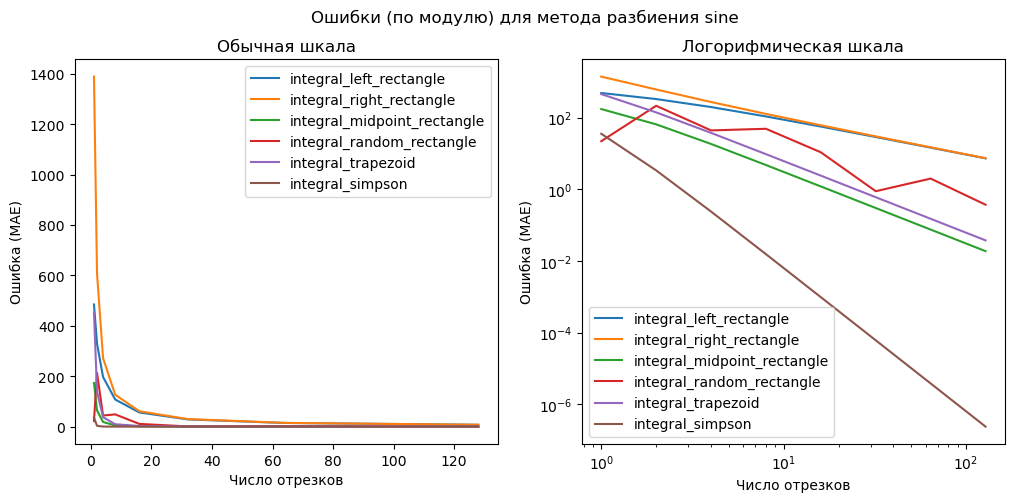

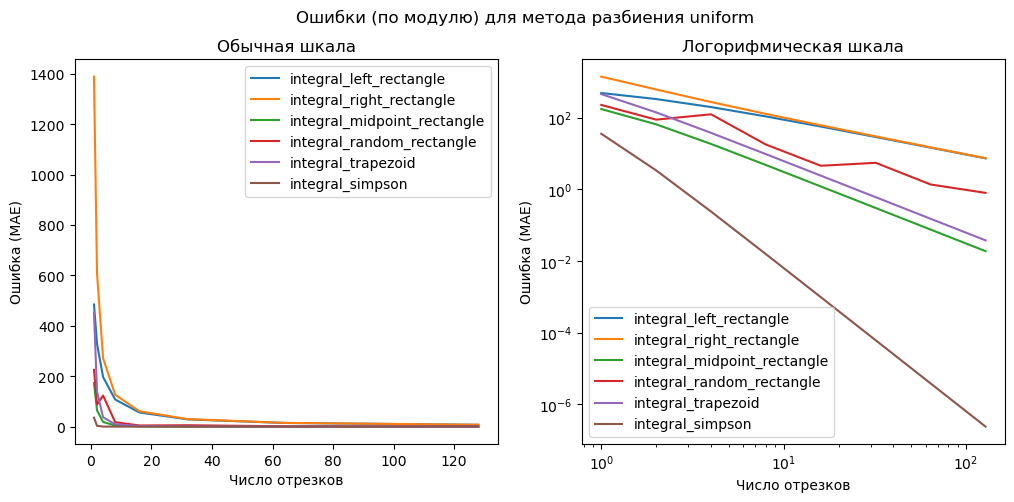

In [43]:
import pandas as pd


def generate_report(f, a, b, n_list, true_value,
                    partition_methods={'uniform': {}, 'power': {}, 'log': {}, 'exp': {}, 'sine': {}, 'random': {}},
                    integration_methods=[integral_left_rectangle,
                                         integral_right_rectangle,
                                         integral_midpoint_rectangle,
                                         integral_random_rectangle,
                                         integral_trapezoid,
                                         integral_simpson]):
    """
    Генерация отчета по методам интегрирования
    :param f: Функция
    :param a: Начало отрезка
    :param b: Конец отрезка
    :param n_list: Список размеров разбиений
    :param true_value: Истинное значение интеграла
    :param partition_methods: Словарь методов разбиения (key = имя метода, value = kwargs)
    :param integration_methods: Массив методов интегрирования
    :return: None
    """
    print("Верное значение интеграла:", true_value)
    results = {}
    errors = {}
    for partition_method_name, kwargs in partition_methods.items():
        results[partition_method_name] = {}
        errors[partition_method_name] = {}
        for integration_method in integration_methods:
            results[partition_method_name][integration_method.__name__] = []
            errors[partition_method_name][integration_method.__name__] = []
            for n in n_list:
                result = integration_method(f, a, b, [n], plot=False, **kwargs)[0]
                results[partition_method_name][integration_method.__name__].append(result)
                error = abs(result - true_value)
                errors[partition_method_name][integration_method.__name__].append(error)

    for partition_method_name in partition_methods:
        df_results = pd.DataFrame(results[partition_method_name])
        df_results.index = n_list
        df_results.index.name = 'n'
        print(f"Результаты для метода разбиения {partition_method_name}:")
        display(df_results)

        df_errors = pd.DataFrame(errors[partition_method_name])
        df_errors.index = n_list
        df_errors.index.name = 'n'
        print(f"Ошибки (по модулю) для метода разбиения {partition_method_name}:")
        display(df_errors)

    for partition_method_name in partition_methods:
        plt.figure(figsize=(12, 5))
        plt.suptitle(f"Ошибки (по модулю) для метода разбиения {partition_method_name}")
        for integration_method in integration_methods:
            plt.subplot(1, 2, 1)
            plt.title("Обычная шкала")
            plt.plot(n_list, errors[partition_method_name][integration_method.__name__],
                     label=integration_method.__name__)
        plt.xlabel("Число отрезков")
        plt.ylabel("Ошибка (MAE)")
        plt.legend()
        for integration_method in integration_methods:
            plt.subplot(1, 2, 2)
            plt.title("Логорифмическая шкала")
            plt.plot(n_list, errors[partition_method_name][integration_method.__name__],
                     label=integration_method.__name__)
        plt.xlabel("Число отрезков")
        plt.ylabel("Ошибка (MAE)")
        plt.xscale("log")
        plt.yscale("log")
        plt.legend()


generate_report(f, a_test, b_test, [1, 2, 4, 8, 16, 32, 64, 128], true_value_0_10,
                partition_methods={'sine': {}, 'uniform': {}})

Верное значение интеграла: 11.43656365691809
Результаты для метода разбиения uniform:


,integral_left_rectangle,integral_right_rectangle,integral_midpoint_rectangle,integral_random_rectangle,integral_trapezoid,integral_simpson
n,,,,,,
1,2.000000,21.436564,11.297443,3.905880,11.718282,11.437722
2,6.648721,16.367003,11.401025,12.947707,11.507862,11.436638
4,9.024873,13.884014,11.427631,11.489080,11.454444,11.436568
8,10.226252,12.655822,11.434327,11.563865,11.441037,11.436564
16,10.830290,12.045075,11.436004,11.341014,11.437682,11.436564
32,11.133147,11.740540,11.436424,11.470463,11.436843,11.436564
64,11.284785,11.588482,11.436529,11.431858,11.436634,11.436564
128,11.360657,11.512505,11.436555,11.438318,11.436581,11.436564


Ошибки (по модулю) для метода разбиения uniform:


,integral_left_rectangle,integral_right_rectangle,integral_midpoint_rectangle,integral_random_rectangle,integral_trapezoid,integral_simpson
n,,,,,,
1,9.436564,10.000000,0.139121,7.530684,0.281718,1.158647e-03
2,4.787842,4.930439,0.035538,1.511143,0.071299,7.402693e-05
4,2.411690,2.447451,0.008933,0.052516,0.017880,4.652482e-06
8,1.210312,1.219259,0.002236,0.127302,0.004474,2.911857e-07
16,0.606274,0.608511,0.000559,0.095549,0.001119,1.820545e-08
32,0.303417,0.303976,0.000140,0.033900,0.000280,1.137943e-09
64,0.151778,0.151918,0.000035,0.004706,0.000070,7.112355e-11
128,0.075907,0.075942,0.000009,0.001754,0.000017,4.447998e-12


Результаты для метода разбиения power:


,integral_left_rectangle,integral_right_rectangle,integral_midpoint_rectangle,integral_random_rectangle,integral_trapezoid,integral_simpson
n,,,,,,
1,2.000000,21.436564,11.297443,11.094209,11.718282,11.437722
2,6.648721,16.367003,11.401025,12.638631,11.507862,11.436638
4,9.024873,13.884014,11.427631,11.457899,11.454444,11.436568
8,10.226252,12.655822,11.434327,11.061128,11.441037,11.436564
16,10.830290,12.045075,11.436004,11.352358,11.437682,11.436564
32,11.133147,11.740540,11.436424,11.453643,11.436843,11.436564
64,11.284785,11.588482,11.436529,11.443067,11.436634,11.436564
128,11.360657,11.512505,11.436555,11.444005,11.436581,11.436564


Ошибки (по модулю) для метода разбиения power:


,integral_left_rectangle,integral_right_rectangle,integral_midpoint_rectangle,integral_random_rectangle,integral_trapezoid,integral_simpson
n,,,,,,
1,9.436564,10.000000,0.139121,0.342355,0.281718,1.158647e-03
2,4.787842,4.930439,0.035538,1.202068,0.071299,7.402693e-05
4,2.411690,2.447451,0.008933,0.021335,0.017880,4.652482e-06
8,1.210312,1.219259,0.002236,0.375436,0.004474,2.911857e-07
16,0.606274,0.608511,0.000559,0.084206,0.001119,1.820545e-08
32,0.303417,0.303976,0.000140,0.017079,0.000280,1.137943e-09
64,0.151778,0.151918,0.000035,0.006504,0.000070,7.112355e-11
128,0.075907,0.075942,0.000009,0.007442,0.000017,4.447998e-12


Результаты для метода разбиения log:


,integral_left_rectangle,integral_right_rectangle,integral_midpoint_rectangle,integral_random_rectangle,integral_trapezoid,integral_simpson
n,,,,,,
1,2.000000,21.436564,11.297443,15.467598,11.718282,11.437722
2,6.648721,16.367003,11.401025,14.909398,11.507862,11.436638
4,9.024873,13.884014,11.427631,11.466624,11.454444,11.436568
8,10.226252,12.655822,11.434327,11.086917,11.441037,11.436564
16,10.830290,12.045075,11.436004,11.436750,11.437682,11.436564
32,11.133147,11.740540,11.436424,11.498589,11.436843,11.436564
64,11.284785,11.588482,11.436529,11.441039,11.436634,11.436564
128,11.360657,11.512505,11.436555,11.437772,11.436581,11.436564


Ошибки (по модулю) для метода разбиения log:


,integral_left_rectangle,integral_right_rectangle,integral_midpoint_rectangle,integral_random_rectangle,integral_trapezoid,integral_simpson
n,,,,,,
1,9.436564,10.000000,0.139121,4.031034,0.281718,1.158647e-03
2,4.787842,4.930439,0.035538,3.472835,0.071299,7.402693e-05
4,2.411690,2.447451,0.008933,0.030060,0.017880,4.652482e-06
8,1.210312,1.219259,0.002236,0.349646,0.004474,2.911857e-07
16,0.606274,0.608511,0.000559,0.000186,0.001119,1.820545e-08
32,0.303417,0.303976,0.000140,0.062025,0.000280,1.137943e-09
64,0.151778,0.151918,0.000035,0.004475,0.000070,7.112355e-11
128,0.075907,0.075942,0.000009,0.001209,0.000017,4.447998e-12


Результаты для метода разбиения exp:


,integral_left_rectangle,integral_right_rectangle,integral_midpoint_rectangle,integral_random_rectangle,integral_trapezoid,integral_simpson
n,,,,,,
1,2.000000,21.436564,11.297443,18.486801,11.718282,11.437722
2,6.648721,16.367003,11.401025,11.726263,11.507862,11.436638
4,9.024873,13.884014,11.427631,12.099263,11.454444,11.436568
8,10.226252,12.655822,11.434327,11.813974,11.441037,11.436564
16,10.830290,12.045075,11.436004,11.482436,11.437682,11.436564
32,11.133147,11.740540,11.436424,11.433527,11.436843,11.436564
64,11.284785,11.588482,11.436529,11.463144,11.436634,11.436564
128,11.360657,11.512505,11.436555,11.439517,11.436581,11.436564


Ошибки (по модулю) для метода разбиения exp:


,integral_left_rectangle,integral_right_rectangle,integral_midpoint_rectangle,integral_random_rectangle,integral_trapezoid,integral_simpson
n,,,,,,
1,9.436564,10.000000,0.139121,7.050237,0.281718,1.158647e-03
2,4.787842,4.930439,0.035538,0.289700,0.071299,7.402693e-05
4,2.411690,2.447451,0.008933,0.662700,0.017880,4.652482e-06
8,1.210312,1.219259,0.002236,0.377410,0.004474,2.911857e-07
16,0.606274,0.608511,0.000559,0.045872,0.001119,1.820545e-08
32,0.303417,0.303976,0.000140,0.003037,0.000280,1.137943e-09
64,0.151778,0.151918,0.000035,0.026580,0.000070,7.112355e-11
128,0.075907,0.075942,0.000009,0.002953,0.000017,4.447998e-12


Результаты для метода разбиения sine:


,integral_left_rectangle,integral_right_rectangle,integral_midpoint_rectangle,integral_random_rectangle,integral_trapezoid,integral_simpson
n,,,,,,
1,2.000000,21.436564,11.297443,8.351788,11.718282,11.437722
2,6.648721,16.367003,11.401025,8.531430,11.507862,11.436638
4,9.024873,13.884014,11.427631,10.232120,11.454444,11.436568
8,10.226252,12.655822,11.434327,11.754066,11.441037,11.436564
16,10.830290,12.045075,11.436004,11.298194,11.437682,11.436564
32,11.133147,11.740540,11.436424,11.468702,11.436843,11.436564
64,11.284785,11.588482,11.436529,11.427966,11.436634,11.436564
128,11.360657,11.512505,11.436555,11.440052,11.436581,11.436564


Ошибки (по модулю) для метода разбиения sine:


,integral_left_rectangle,integral_right_rectangle,integral_midpoint_rectangle,integral_random_rectangle,integral_trapezoid,integral_simpson
n,,,,,,
1,9.436564,10.000000,0.139121,3.084776,0.281718,1.158647e-03
2,4.787842,4.930439,0.035538,2.905133,0.071299,7.402693e-05
4,2.411690,2.447451,0.008933,1.204444,0.017880,4.652482e-06
8,1.210312,1.219259,0.002236,0.317503,0.004474,2.911857e-07
16,0.606274,0.608511,0.000559,0.138370,0.001119,1.820545e-08
32,0.303417,0.303976,0.000140,0.032138,0.000280,1.137943e-09
64,0.151778,0.151918,0.000035,0.008598,0.000070,7.112355e-11
128,0.075907,0.075942,0.000009,0.003488,0.000017,4.447998e-12


Результаты для метода разбиения random:


,integral_left_rectangle,integral_right_rectangle,integral_midpoint_rectangle,integral_random_rectangle,integral_trapezoid,integral_simpson
n,,,,,,
1,2.000000,21.436564,11.297443,14.067821,11.718282,11.437722
2,6.648721,16.367003,11.401025,11.665488,11.507862,11.436638
4,9.024873,13.884014,11.427631,11.668459,11.454444,11.436568
8,10.226252,12.655822,11.434327,11.266919,11.441037,11.436564
16,10.830290,12.045075,11.436004,11.438775,11.437682,11.436564
32,11.133147,11.740540,11.436424,11.425053,11.436843,11.436564
64,11.284785,11.588482,11.436529,11.425567,11.436634,11.436564
128,11.360657,11.512505,11.436555,11.436099,11.436581,11.436564


Ошибки (по модулю) для метода разбиения random:


,integral_left_rectangle,integral_right_rectangle,integral_midpoint_rectangle,integral_random_rectangle,integral_trapezoid,integral_simpson
n,,,,,,
1,9.436564,10.000000,0.139121,2.631257,0.281718,1.158647e-03
2,4.787842,4.930439,0.035538,0.228924,0.071299,7.402693e-05
4,2.411690,2.447451,0.008933,0.231895,0.017880,4.652482e-06
8,1.210312,1.219259,0.002236,0.169644,0.004474,2.911857e-07
16,0.606274,0.608511,0.000559,0.002212,0.001119,1.820545e-08
32,0.303417,0.303976,0.000140,0.011511,0.000280,1.137943e-09
64,0.151778,0.151918,0.000035,0.010996,0.000070,7.112355e-11
128,0.075907,0.075942,0.000009,0.000465,0.000017,4.447998e-12


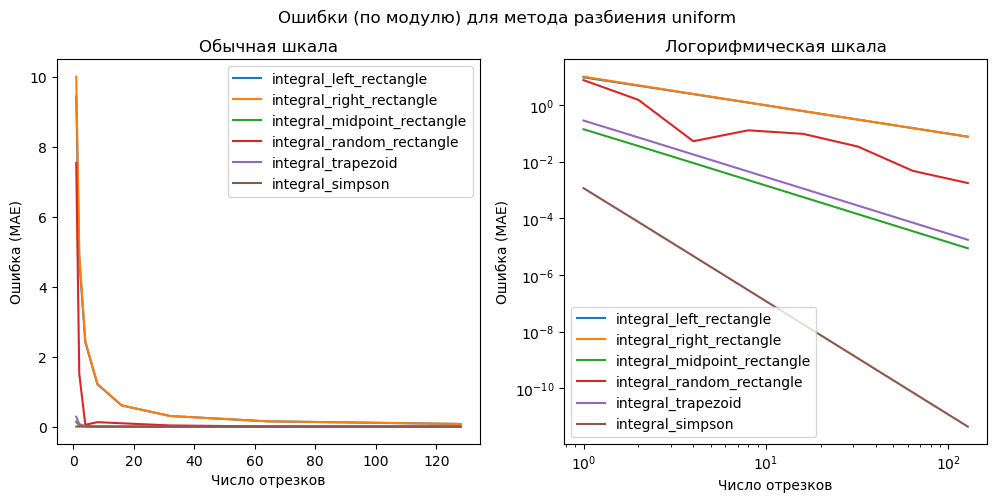

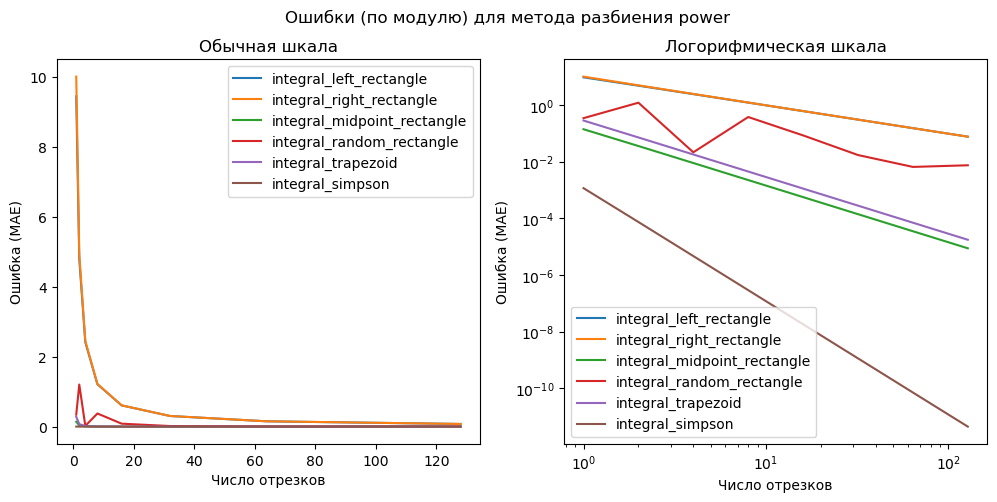

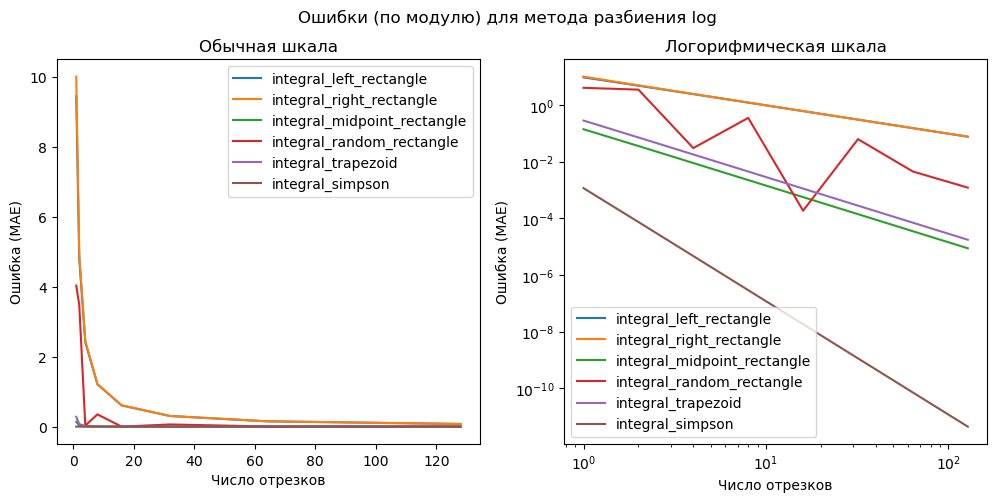

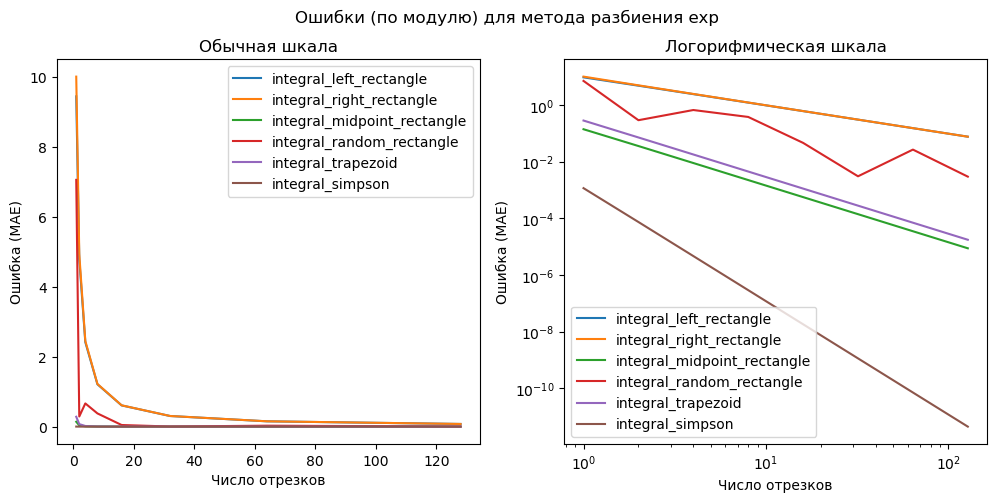

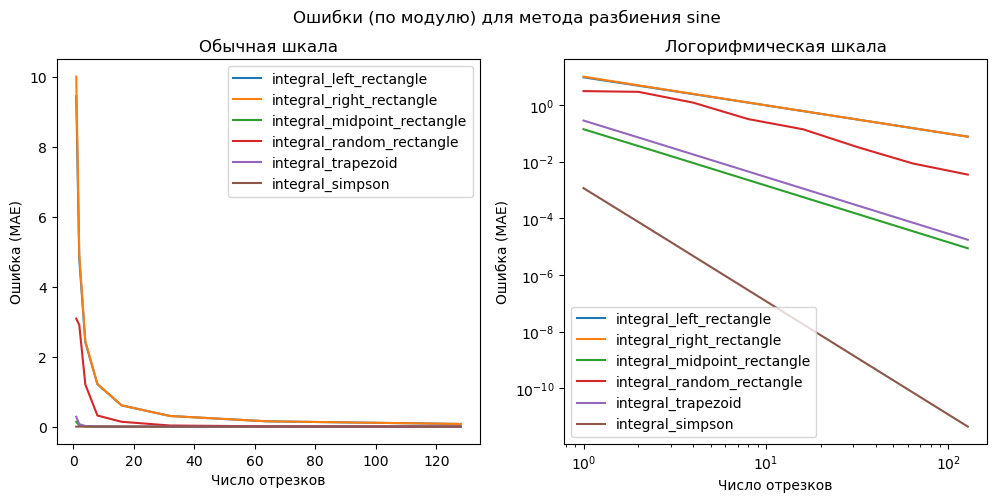

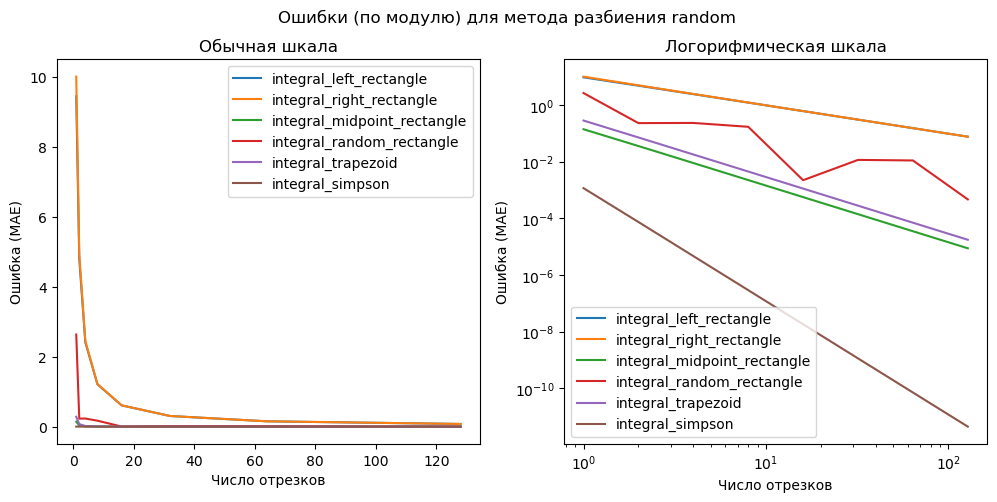

In [46]:
generate_report(f, a, b, [1, 2, 4, 8, 16, 32, 64, 128], true_value)